# Estimating the gravitational force of a 3D density model #

This problem explores the gravitational response of three-dimensional density model onto specified receiver locations. The gravitational force of a body at the location $\mathbf{src}=[x_{src},y_{src},z_{src}]$ and the volume $V$ onto a recording location $\mathbf{rec}=[x_r,y_r,z_r]$ can be expressed as (with G as the gravitational constant), and also with $\mathbf{r} = [x,y,z]=\mathbf{src} - \mathbf{rec}$:

$$\mathbf{g} = G M \frac{\mathbf{r}}{\mathbf{|\mathbf{r}|}^3}$$ 

Assuming that the density $\rho$ is constant through the body we can write the mass $M$ as $M = \rho V$. The volume of a body with arbitrary shape can be expressed as $V = \int_v dv= \int_x \int_y \int_z dx dy dz$. 

This integral can be solved in several ways. This example uses the analytical approach of Plouff (1976), which is valid for rectangularly shaped prisms (grid cells), see also Nagy et al (2000). The solution for the vertical component of the gravitational force ($g_z$) following this appraoch is: 

$$ g_z = G \rho \sum_{i=1}^2 \sum_{j=1}^2 \sum_{k=1}^2 s [tan^{-1} \frac{x_i y_j}{z_k R_{ijk}} - x_i ln(R_{ijk} + y_j) - b_j ln(R_{ijk} + x_i)] $$

with $s=(-1)^{i+j+k}$. 

Problem details: 
- Model: Consists of density values (in kg/m$^3$) oriented in a three-dimensional, rectangular grid. Model consists of one (Nx1) array, with N being the number of grid cells. Coordinates (in m) of all model nodes are stored in a ((N+1)x3) array. Here we only allow recording locations along the flat surface, i.e. z = 0 for all coordinates.
- Data: Gravitational force in x, y and z directions.
- Forward: $ g = G \rho \int_V \frac{1}{r^2} dV $ is solved for each component x, y and z by integrating along the edges of the rectangular prism using the approach by Plouff (1976). 

Code details:
- Initialise the problem: ``from InversionTestProblems import GravityForward as g_fcn``. Makes the subsequent functions available.
- ``grav_basics=grav_fcn.Basics()`` initialises a ``basics`` class object that contains the XXXX and changeable parameters. Setting parameters is optional:
  - grav_basics.anomaly_density: Specify the density of the anomaly (single float), in kg/m$^3$
  - grav_basics.background_density: Specify the background density (single float), in kg/m$^3$
  - grav_basics.x_rec: Specify recording locations in x-direction 
  - grav_basics.y_rec: Specify recording locations in y-direction
- ``model = grav_fcn.init_routine(grav_basics)`` initialises the density model with the specified background and anomaly densities.
- ``synthetics, gradient = grav_fcn.forward(grav_basics, model)`` calculates the x, y and z components of gravitational force based on the model and the recording locations. A gradient is not needed here - ''gradient'' is returned as an empty variable. 
- ``grav_fcn.plot_model(grav_basics, model, synthetics)`` plots the synthetic data and the result.




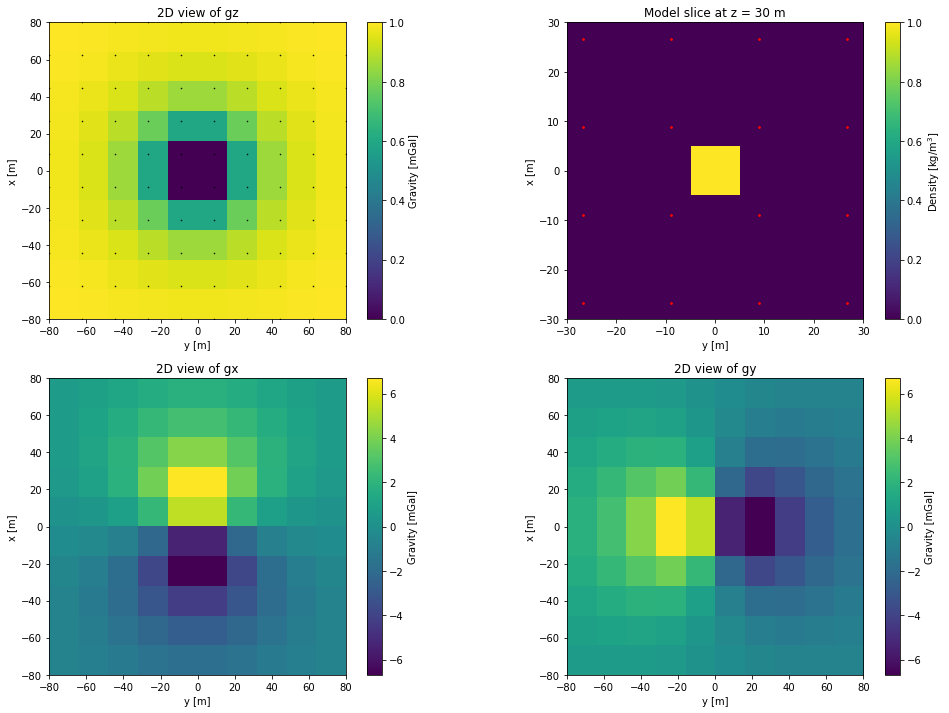

[-80.         -62.22222222 -44.44444444 -26.66666667  -8.88888889
   8.88888889  26.66666667  44.44444444  62.22222222  80.        ]


In [4]:
import numpy as np

from GravityForward_data import GravityForward as grav_fcn

grav_basics=grav_fcn.Basics()
grav_basics.anomaly_density=2000
grav_basics.background_density=0
grav_basics.x_rec=np.linspace(-80.0, 80.0, 10)
grav_basics.y_rec=np.linspace(-80.0, 80.0, 10)

model=grav_fcn.init_routine(grav_basics)

synthetics, gradient = grav_fcn.forward(grav_basics, model)

grav_fcn.plot_model(grav_basics, model, synthetics)
print(grav_basics.x_rec)